In [1]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
sys.getrecursionlimit()

3000

### test

In [3]:
path =  [1,2,3,4,5,6,7,1]

coordinate =  {1:(1,2), 2:(2,4),3:(14,4),4:(2,1),5:(19,23),6:(12,1),7:(34,6)}


### 交差しているかを判定する関数

In [12]:
def cross_check(a,b,c,d):
    ax,ay = a[0],a[1]; bx,by = b[0],b[1]; cx,cy = c[0],c[1]; dx,dy = d[0],d[1]
    ta = (cx - dx) * (ay - cy) + (cy - dy) * (cx - ax)
    tb = (cx - dx) * (by - cy) + (cy - dy) * (cx - bx)
    tc = (ax - bx) * (cy - ay) + (ay - by) * (ax - cx)
    td = (ax - bx) * (dy - ay) + (ay - by) * (ax - dx)
    return (tc * td < 0) &( ta * tb < 0)

def two_opt(path, coordinate, n =  0):
    if sys.getrecursionlimit()-1 ==  n :
        return path 
    edges =  [(path[i], path[i+1])for i in range(len(path )-1)]
    for i in range(len(edges)):
        for j in range(i+2,len(edges)):
            a,b = edges[i][0],edges[i][1]; c, d =  edges[j][0], edges[j][1]
            if cross_check(coordinate[a],coordinate[b],coordinate[c], coordinate[d]):
                path = path[:i+1]+ path[i+1:j+1][::-1]+path[j+1:]
                return two_opt(path, coordinate, n+1)
    return path 

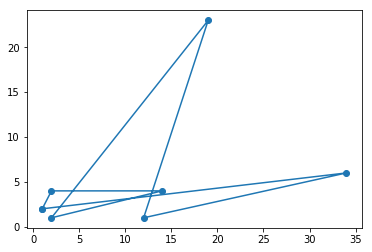

In [13]:
x,y =  zip(*[coordinate[i] for i in path])
plt.scatter(x,y)
plt.plot(x,y,'-')

In [10]:
two_opt(path, coordinate)

[1, 2, 3, 5, 7, 6, 4, 1]

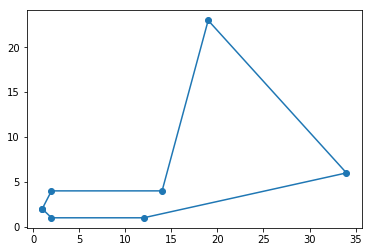

In [11]:
new_path =  two_opt(path, coordinate)
x,y =  zip(*[coordinate[i] for i in new_path])
plt.scatter(x,y)
plt.plot(x,y,'-')